In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))
sys.path.append(parent_dir)


In [18]:
csv_path = os.path.join(parent_dir, 'data', 'scores', 'ghostfacenet_LFW_base_scores.csv')
# csv_path = os.path.join(parent_dir, 'test.csv')

In [19]:
data = pd.read_csv(csv_path)

Text(0.5, 1.0, 'ghostfacenet - same (1) and different (0) people embeddings similarity')

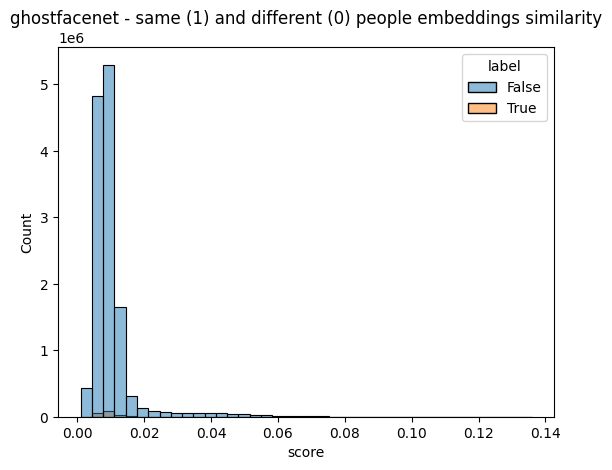

In [20]:
sns.histplot(data = data, x = 'score', hue='label',bins = 40)
plt.title('ghostfacenet - same (1) and different (0) people embeddings similarity')

In [5]:
same_person = data[data['label'] == 1]
diff_person = data[data['label'] == 0]

In [6]:
print(f"Same person mean: {same_person['score'].mean()}")
print(f'Same person std: {same_person["score"].std()}')
print(f"Diff person mean: {diff_person['score'].mean()}")
print(f'Diff person std: {diff_person["score"].std()}')

Same person mean: 0.009976831045686205
Same person std: 0.005548930801665588
Diff person mean: 0.009389922202113404
Diff person std: 0.004939331711483904


In [7]:
thresholds = np.linspace(0, 0.08, 81)

In [8]:
accs = []
f1s = []
precs = []
recs = []
fars = []
frrs = []

In [9]:
ground_truth = data['label']
for t in thresholds:
    decisions = data['score'] > t
    acc = accuracy_score(ground_truth, decisions)
    f1 = f1_score(ground_truth, decisions)
    prec = precision_score(ground_truth, decisions)
    rec = recall_score(ground_truth, decisions)
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)
    accs.append(acc)
    f1s.append(f1)
    precs.append(prec)
    recs.append(rec)
    

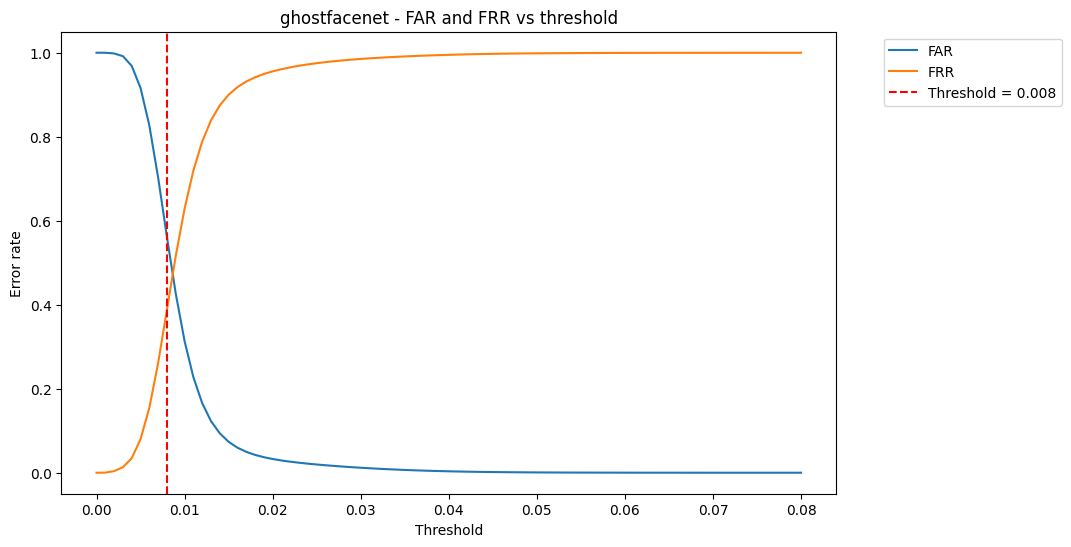

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fars, label='FAR')
plt.plot(thresholds, frrs, label='FRR')
plt.axvline(x=0.008, color='r', linestyle='--', label='Threshold = 0.008')
plt.title('ghostfacenet - FAR and FRR vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

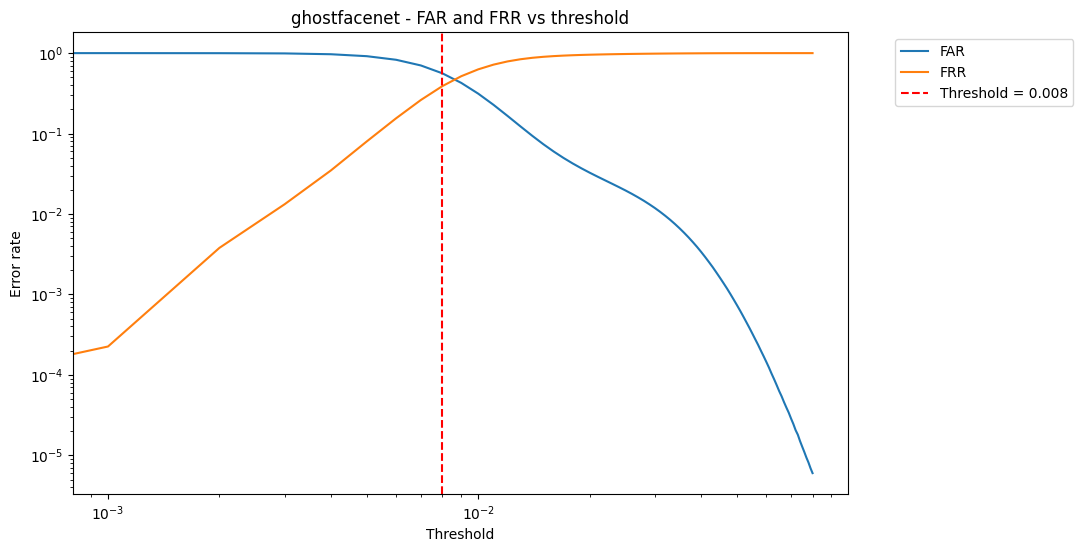

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, fars, label='FAR')
plt.plot(thresholds, frrs, label='FRR')
plt.axvline(x=0.008, color='r', linestyle='--', label='Threshold = 0.008')
plt.title('ghostfacenet - FAR and FRR vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

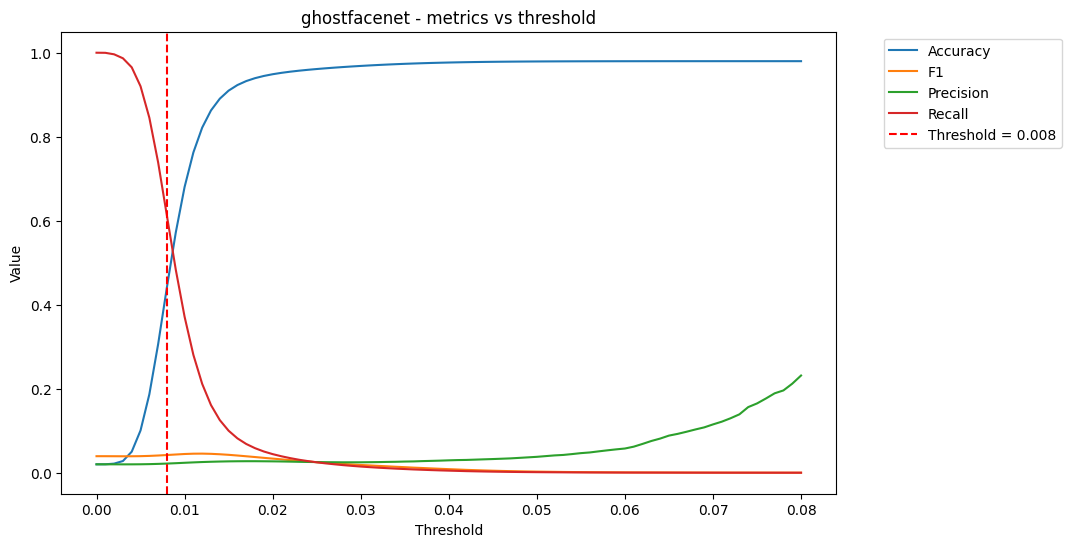

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accs, label='Accuracy')
plt.plot(thresholds, f1s, label='F1')
plt.plot(thresholds, precs, label='Precision')
plt.plot(thresholds, recs, label='Recall')
plt.axvline(x=0.008, color='r', linestyle='--', label='Threshold = 0.008')
plt.title('ghostfacenet - metrics vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

In [13]:
decisions = data['score'] > 0.008
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)
print(f'Accuracy: {round(acc, 5)}')
print(f'F1: {round(f1, 5)}')
print(f'Precision: {round(prec, 5)}')
print(f'Recall: {round(rec, 5)}')
print(f'FAR: {round(FAR, 7)}')
print(f'FRR: {round(FRR, 5)}')

Accuracy: 0.44226
F1: 0.04223
Precision: 0.02187
Recall: 0.61131
FAR: 0.5612072
FRR: 0.38869


## Test

In [14]:
csv_path = os.path.join(parent_dir, 'data', 'scores', 'ghostfacenet_test_front_base_scores.csv')
data = pd.read_csv(csv_path)

In [15]:
ground_truth = data['label']

In [16]:
decisions = data['score'] > 0.008
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)
print(f'Accuracy: {round(acc, 5)}')
print(f'F1: {round(f1, 5)}')
print(f'Precision: {round(prec, 5)}')
print(f'Recall: {round(rec, 5)}')
print(f'FAR: {round(FAR, 7)}')
print(f'FRR: {round(FRR, 5)}')

Accuracy: 0.56569
F1: 0.04315
Precision: 0.02258
Recall: 0.48705
FAR: 0.4326949
FRR: 0.51295


Text(0.5, 1.0, 'ghostfacenet - same (1) and different (0) people embeddings similarity')

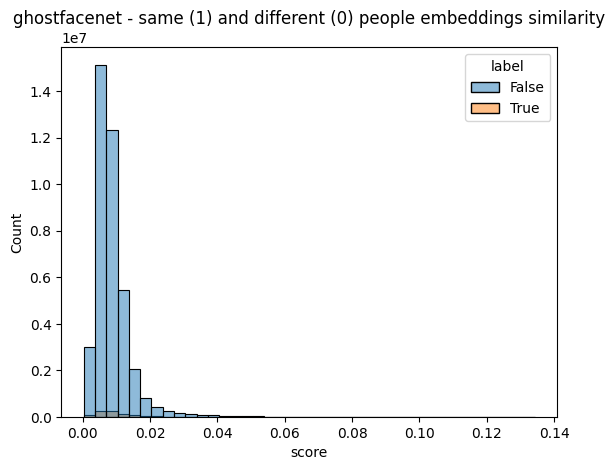

In [17]:
sns.histplot(data = data, x = 'score', hue='label',bins = 40)
plt.title('ghostfacenet - same (1) and different (0) people embeddings similarity')